# Predicting car price using KNN

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

You can read more about the data set and download it [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 26

cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=col_names)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

#  Dara cleaning

In [4]:
qm_count = {}

for col in cars.columns:
    if cars[col].dtype == 'object':
        qm_count[col] = len(cars[cars[col] == '?'])
    
qm_count

{'aspiration': 0,
 'body-style': 0,
 'bore': 4,
 'drive-wheels': 0,
 'engine-location': 0,
 'engine-type': 0,
 'fuel-system': 0,
 'fuel-type': 0,
 'horsepower': 2,
 'make': 0,
 'normalized-losses': 41,
 'num-of-cylinders': 0,
 'num-of-doors': 2,
 'peak-rpm': 2,
 'price': 4,
 'stroke': 4}

In [5]:
for col in ['normalized-losses','price', 'bore', 'stroke','horsepower', 'peak-rpm']:
    cars[col] = cars[col].apply(lambda x: float(x) if x != '?' else np.nan)

In [6]:
col_numeric = []
for col in cars.columns:
    if cars[col].dtype != 'object':
        col_numeric.append(col)
        
col_numeric

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [7]:
numeric_cars = cars[col_numeric[1:]].copy()
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

# Univariate model

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomise the order of rows in dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:round(len(rand_df)/2)]
    test_df = rand_df.iloc[round(len(rand_df)/2):]
    
    # Fit a KNN model using default k(=5) value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    prediction = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[[target_col]], prediction)
    rmse = np.sqrt(mse)
    
    return rmse

train_cols = numeric_cars.columns.drop('price')
target_col = 'price'

rmse_results = {}

for col in train_cols:
    rmse_val = knn_train_test(col, target_col, numeric_cars)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

It seems that with k=5, the engine-size gives the smallest rmse.

Now, we want to modify the knn_train_test() function and test it with different k values.

In [31]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomise the order of rows in dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:round(len(rand_df)/2)]
    test_df = rand_df.iloc[round(len(rand_df)/2):]
    
    # Fit a KNN model using k value
    k_values = [1,3,5,7,9]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        prediction = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[[target_col]], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    
    return k_rmse

train_cols = numeric_cars.columns.drop('price')
target_col = 'price'


for col in train_cols:

    rmse_val = knn_train_test(col, target_col, numeric_cars)
    k_rmse_results[col] = rmse_val 
    
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

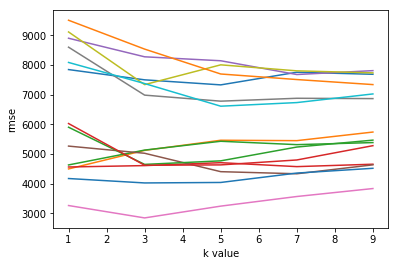

In [32]:
for key, val in k_rmse_results.items():
    plt.plot(list(val.keys()), list(val.values()))
    plt.xlabel('k value')
    plt.ylabel('rmse')

# Multivariate model

In [33]:
# Compute average RMSE across different `k` values for each feature.

feature_avg_rmse = {}
for key, val in k_rmse_results.items():
    avg_rmse = np.mean(list(val.values()))
    feature_avg_rmse[key] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_avg_rmse = series_avg_rmse.sort_values()

print(sorted_avg_rmse)
sorted_features = sorted_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [43]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomise the order of rows in dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:round(len(rand_df)/2)]
    test_df = rand_df.iloc[round(len(rand_df)/2):]
    
    # Fit a KNN model using k value
    k_values = [5]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        prediction = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    
    return k_rmse

k_rmse_results = {}
for num_col in range(2,7):
    train_cols = sorted_features[:num_col]
    rmse_val = knn_train_test(train_cols, target_col, numeric_cars)
    k_rmse_results['{} best feature'.format(num_col)] = rmse_val 
    
k_rmse_results


{'2 best feature': {5: 2949.8817277180374},
 '3 best feature': {5: 3580.7376651928435},
 '4 best feature': {5: 3487.340917327035},
 '5 best feature': {5: 3410.2170133901805},
 '6 best feature': {5: 3478.510890118539}}

In [48]:
k_rmse_sort = []
for key, val in k_rmse_results.items():
    k_rmse_sort.append((list(val.values()), key))
    
sorted(k_rmse_sort)

[([2949.8817277180374], '2 best feature'),
 ([3410.2170133901805], '5 best feature'),
 ([3478.510890118539], '6 best feature'),
 ([3487.340917327035], '4 best feature'),
 ([3580.7376651928435], '3 best feature')]

# Hyperparameter Tuning

In [49]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomise the order of rows in dataframe
    rand_df = df.reindex(np.random.permutation(df.index))
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:round(len(rand_df)/2)]
    test_df = rand_df.iloc[round(len(rand_df)/2):]
    
    # Fit a KNN model using k value
    k_values = [i for i in range(1, 25)]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        prediction = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    
    return k_rmse

k_rmse_results = {}
for num_col in [2, 5, 6]: # Select the best top 3 models in the last step
    train_cols = sorted_features[:num_col]
    rmse_val = knn_train_test(train_cols, target_col, numeric_cars)
    k_rmse_results['{} best feature'.format(num_col)] = rmse_val 
    
k_rmse_results

{'2 best feature': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '5 best feature': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8: 3848.635835654326,
  9: 3977.8149139381726,
  10: 3994.8132211260104,
  11: 4159.843526607947,
  12: 4294.3389473154875,
  13: 4380.848359486949,
  14: 4466.368754416089,
  15: 4522.420

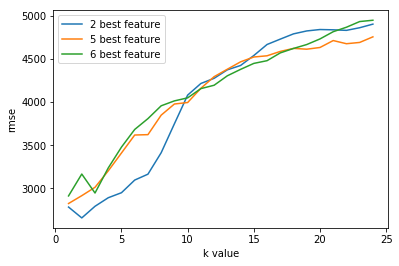

In [52]:
for key, val in k_rmse_results.items():
    plt.plot(list(val.keys()), list(val.values()), label='{}'.format(key))
    plt.xlabel('k value')
    plt.ylabel('rmse')
    plt.legend()